# K Nearest Neighbor(KNN)



* Machine learning algorithms can be broadly classified into two:

1. Supervised Learning

2. Unsupervised Learning

* In supervised learning, we train our models on a labelled set of data and ask it to predict the label for an unlabeled point. For example, a cancer prediction model is trained on many clinical test results that are labelled as either positive or negative. The trained model can then predict whether an unlabeled test result is positive or negative.

* On the other hand, unsupervised learning is done on unlabeled data set.

* **KNN** belongs to <u>**supervised**</u> learning. 


reference : [math intuition behind the algorithm](https://www.saedsayad.com/k_nearest_neighbors.htm)

## How KNN works

* KNN algorithm predicts the label for a new point based on the label of its neighbors. KNN rely on the assumption that similar data points lie closer in spatial coordinates.


###### Nearest Neighbor
* K in KNN is the number of nearest neighbors we consider for making the prediction. We determine the nearness of a point based on its distance(eg: **Euclidean**, Manhattan etc)from the point under consideration. For example, if K=5, we consider 5 nearest points and take the label of majority of these 5 points as the predicted label.


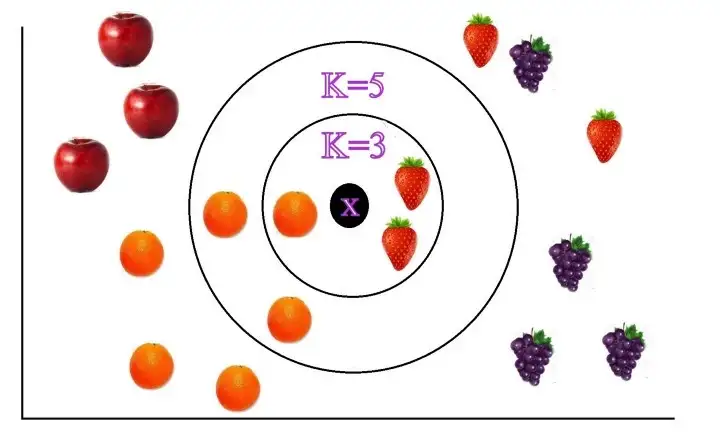

* Lets examine how the neighbors are estimated for our previous example. Consider the above figure. Our aim is to predict the label for the point marked as X. If K=3, out of 3 neighboring points of X, 2 are strawberries and 1 is orange. So we predict the label for X as strawberry. If K=5, out of 5 neighboring points of X, 3 are oranges and 2 are strawberries. So we predict the label for X as Orange.



* From above example, we can see that as K varies, the predicted label differs. Thus K is the hyper parameter for KNN that is to be tuned to find the optimal value. On the labelled train data, we experiment with different values of K and choose the K value that gives the best result. Once the K value is fixed, this value can later be used for predicting unlabeled data points.



In [1]:
import pandas as pd

In [69]:
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [70]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [78]:
labels = iris['species']

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
label_ids=label_encoder.fit_transform(labels)

In [80]:
label_ids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
iris['target'] = label_ids

In [82]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [83]:
# We need to first separate the species(label) column from the data set.

X=iris.drop(columns=['species', 'target'])
Y=iris['target']

In [88]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [90]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

* In machine learning, we train our model on the train data and tune the hyper parameters(K for KNN)using the models performance on cross validation(CV) data. So lets split the data into train and CV data sets using the **train_test_split()** function in sklearn library.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

* Since KNN works based on distance between data points, its important that we standardize the data before training the model. Standardization helps in avoiding problems due to scale. We use StandardScaler() function from sklearn for data standardization.

In [98]:
from sklearn import neighbors


KNN_model=neighbors.KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [99]:
pred=KNN_model.predict(X_test)

In [100]:
pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 0, 1, 0, 1])

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test, pred)

1.0